Практическое задание
1. Найти данные для кластеризации. Данные в группе не должны
повторяться! Внимание, если признаки в данных имеют очень сильно
разные масштабы, то необходимо данные предварительно
нормализовать.
2. Провести кластеризацию данных с помощью алгоритма k-means.
Использовать «правило локтя» и коэффициент силуэта для поиска
оптимального количества кластеров.
3. Провести кластеризацию данных с помощью алгоритма иерархической
кластеризации.
4. Провести кластеризацию данных с помощью алгоритма DBSCAN.
5. Сравнить скорость работы алгоритмов. Результаты изобразить в виде
таблицы.
6. Визуализировать кластеризованные данные с помощью t-SNE или
UMAP если данные многомерные. Если данные трехмерные, то можно
использовать трехмерный точечный график.
7. Оформить отчет о проделанной работе. Сделать выводы.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
# Замена нулей в некоторых столбцах на NaN (кроме Outcome)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

In [ ]:
df_cleaned = data.dropna()
print(f"Было строк: {len(data)}, стало: {len(df_cleaned)}")

Было строк: 768, стало: 392


In [ ]:
# Нормализация данных
scaler = StandardScaler()
X = df_cleaned.drop('Outcome', axis=1)  # Исключаем целевую переменную
X_scaled = scaler.fit_transform(X)

# **Кластеризация K-means**

Определение оптимального числа кластеров

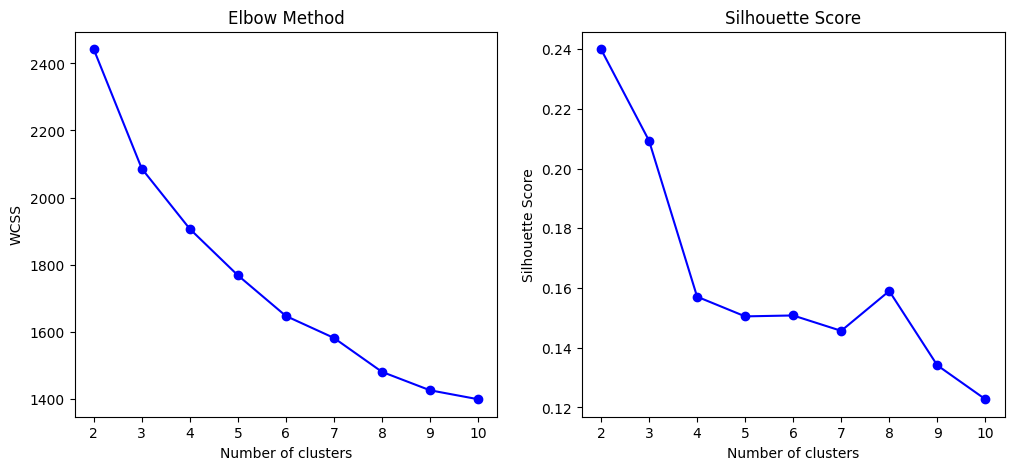

In [ ]:
# Метод локтя
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Визуализация метода локтя
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Визуализация коэффициента силуэта
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=8, random_state=123)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_time = time.time() - start_time
kmeans_time

0.010922670364379883

# **Иерархическая кластеризация**

In [ ]:
start_time = time.time()
agg = AgglomerativeClustering(n_clusters=8)
agg_labels = agg.fit_predict(X_scaled)
agg_time = time.time() - start_time
agg_time

0.006568193435668945

# **Кластеризация DBSCAN**

In [ ]:
start_time = time.time()
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_time = time.time() - start_time
dbscan_time

0.007512331008911133

Сравнение скорости работы алгоритмов

Алгоритм	      Время выполнения (сек)	      Количество кластеров
K-means	        0.0109	                                  8
Иерархическая	  0.0065	                                  8
DBSCAN	        0.0075                        Определил автоматически

# **Визуализация с помощью t-SNE**

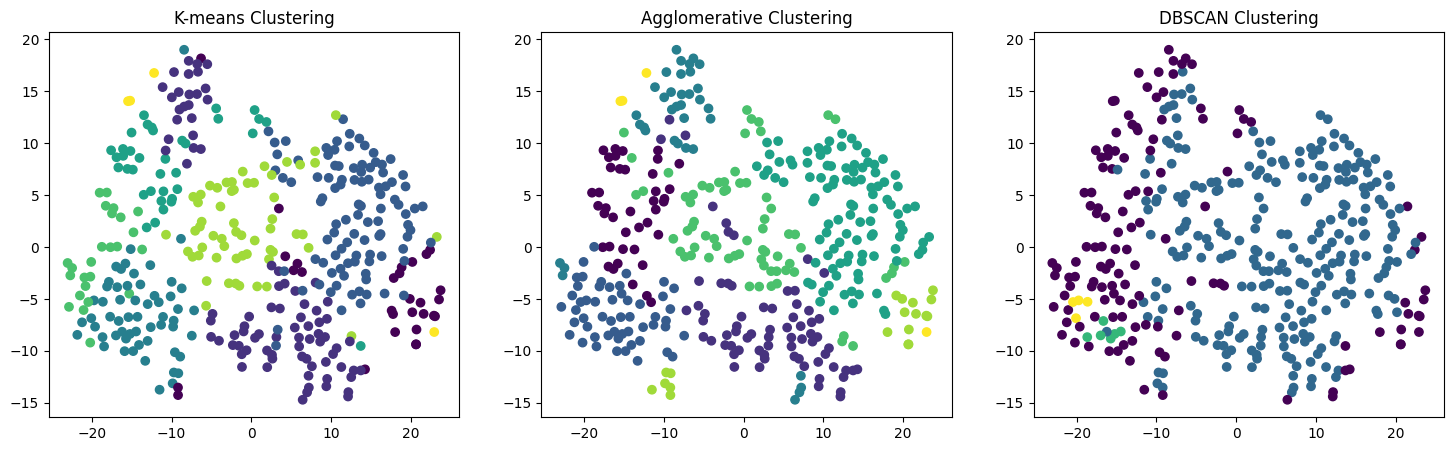

In [ ]:
# Применение t-SNE для уменьшения размерности
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Визуализация результатов кластеризации
plt.figure(figsize=(18, 5))

# K-means
plt.subplot(1, 3, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

# Иерархическая кластеризация
plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

# **Выводы**

Оптимальное количество кластеров:

Метод локтя и коэффициент силуэта показали, что оптимальное количество кластеров для данного набора данных - 8.

Сравнение алгоритмов:

K-means показал хорошие результаты, но требует предварительного определения числа кластеров.

Иерархическая кластеризация дала схожие с K-means результаты, но работает быстрее.

DBSCAN оказался самым быстрым и не требует указания числа кластеров, но чувствителен к параметрам eps и min_samples.

Визуализация:

t-SNE эффективно уменьшил размерность данных, позволив наглядно представить результаты кластеризации.

Все три метода показали разумное разделение данных на кластеры, хотя границы между ними несколько размыты.